In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
s = df.isna().sum()
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.duplicated().sum()

0

## Seperate X and Y(Survived)

In [6]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## Seperate cat and con for X

In [9]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
cat

['Sex', 'Embarked']

In [11]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## Create a preprocessing pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                      ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [14]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [17]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=.30, random_state=42)

In [21]:
xtrain.shape

(623, 10)

In [22]:
xtest.shape

(268, 10)

In [23]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
445,-1.566107,-1.949034,-0.474545,2.008933,0.999770,0.0,1.0,0.0,0.0,1.0
650,0.827377,-0.104637,-0.474545,-0.473674,-0.489442,0.0,1.0,0.0,0.0,1.0
172,0.827377,-2.179583,0.432793,0.767630,-0.424256,1.0,0.0,0.0,0.0,1.0
450,-0.369365,0.510161,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0
314,-0.369365,1.048110,0.432793,0.767630,-0.119886,0.0,1.0,0.0,0.0,1.0


In [25]:
ytrain.head()

,Survived
445,1
650,0
172,1
450,0
314,0


In [26]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
709,0.827377,-0.104637,0.432793,0.767630,-0.341452,0.0,1.0,1.0,0.0,0.0
439,-0.369365,0.125912,-0.474545,-0.473674,-0.437007,0.0,1.0,0.0,0.0,1.0
840,0.827377,-0.719436,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
720,-0.369365,-1.795334,-0.474545,0.767630,0.016023,1.0,0.0,0.0,0.0,1.0
39,0.827377,-1.180535,0.432793,-0.473674,-0.422074,1.0,0.0,1.0,0.0,0.0


In [27]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


## PreProcessing Completed

## Alogirithm Evaluation

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [29]:
dct = {'Logistic': LogisticRegression(),
       'Decision': DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier(),
       'KNN': KNeighborsClassifier(),
       'SVM': SVC()}

In [31]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

## Fit the model and Evaluate
Evaluate model with F1 score

In [32]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [34]:
tr = []
ts = []
tr_cv =[]

for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate f1 score in train and test
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
     # 5 - fold cross validation on training
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in tr, ts, tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)

     # Print above results for each model
    print(f'Model name : {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Train F1 Cross Validated : {f1_cv:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print('\n=========================================================================\n')

Model name : Logistic

Train F1 : 0.7133
Train F1 Cross Validated : 0.7786
Test F1 : 0.7606


Model name : Decision

Train F1 : 0.9735
Train F1 Cross Validated : 0.7399
Test F1 : 0.6881


Model name : Random Forest

Train F1 : 0.9735
Train F1 Cross Validated : 0.7649
Test F1 : 0.7407


Model name : Gradient Boost

Train F1 : 0.8638
Train F1 Cross Validated : 0.7994
Test F1 : 0.7363


Model name : KNN

Train F1 : 0.7872
Train F1 Cross Validated : 0.7696
Test F1 : 0.7228


Model name : SVM

Train F1 : 0.7721
Train F1 Cross Validated : 0.7999
Test F1 : 0.7707




In [35]:
tr

[0.7133182844243793,
 0.9734513274336283,
 0.9734513274336283,
 0.863849765258216,
 0.7871853546910755,
 0.772093023255814]

In [36]:
ts

[0.7605633802816901,
 0.6880733944954128,
 0.7407407407407407,
 0.7363184079601989,
 0.7227722772277227,
 0.7707317073170732]

In [37]:
tr_cv

[0.7785775608737076,
 0.7399467692203034,
 0.7649345375600695,
 0.7994166631704758,
 0.769575621470407,
 0.7999327233126278]

## Save above Result in Dataframe

In [39]:
list(dct.keys())

['Logistic', 'Decision', 'Random Forest', 'Gradient Boost', 'KNN', 'SVM']

In [40]:
result_dct = {'Model': list(dct.keys()),
              'Train_f1': tr,
              'Test_f1': ts,
              'Train_cv': tr_cv}

In [41]:
result_df = pd.DataFrame(result_dct)

In [42]:
result_df

,Model,Train_f1,Test_f1,Train_cv
0,Logistic,0.713318,0.760563,0.778578
1,Decision,0.973451,0.688073,0.739947
2,Random Forest,0.973451,0.740741,0.764935
3,Gradient Boost,0.863850,0.736318,0.799417
4,KNN,0.787185,0.722772,0.769576
5,SVM,0.772093,0.770732,0.799933


In [43]:
result_df.sort_values('Test_f1', ascending=False)

,Model,Train_f1,Test_f1,Train_cv
5,SVM,0.772093,0.770732,0.799933
0,Logistic,0.713318,0.760563,0.778578
2,Random Forest,0.973451,0.740741,0.764935
3,Gradient Boost,0.863850,0.736318,0.799417
4,KNN,0.787185,0.722772,0.769576
1,Decision,0.973451,0.688073,0.739947


## Based on Highest Test_f1 result of SVM we will create SVM model

In [66]:
best_model = SVC(probability=True)
best_model.fit(xtrain, ytrain)

SVC(probability=True)

In [67]:
best_model.score(xtrain, ytrain)

0.8426966292134831

In [68]:
best_model.score(xtest, ytest)

0.8246268656716418

## Predict the result

In [69]:
ypred_tr = best_model.predict(xtrain)
ypres_ts = best_model.predict(xtest)

In [70]:
ypred_tr[0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [71]:
ytrain.head()

,Survived
445,1
650,0
172,1
450,0
314,0


In [72]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [73]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


## Create a confusion metricks

In [74]:
c = best_model.classes_
c

array([0, 1], dtype=int64)

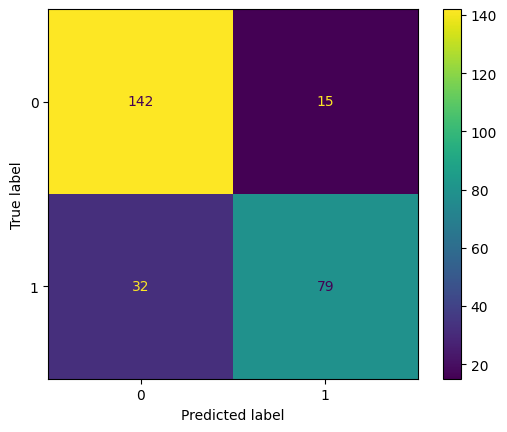

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

## Print Classification Report

In [76]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.71      0.77       111

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.83      0.82      0.82       268



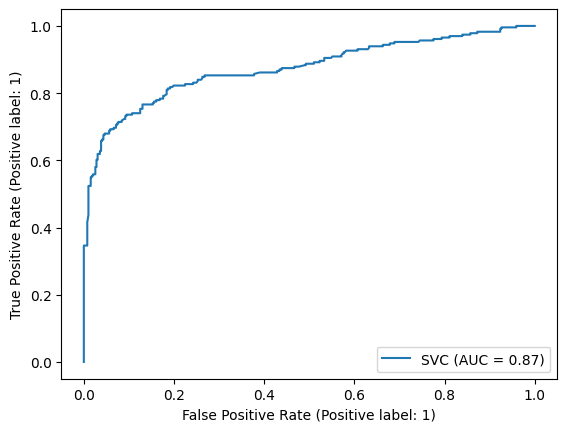

In [77]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, xtrain, ytrain)

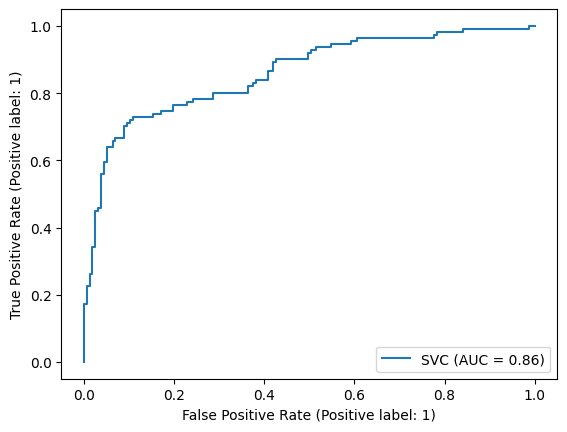

In [78]:
RocCurveDisplay.from_estimator(best_model, xtest, ytest)

In [79]:
auc_scores = cross_val_score(best_model, xtrain, ytrain, cv=5, scoring='roc_auc')
auc_scores

array([0.78368794, 0.89928453, 0.79196478, 0.82720178, 0.85117057])

In [80]:
auc_scores.mean()

0.8306619215201284

## Predict the result from out of sample data

In [83]:
xnew = pd.read_csv('test_titanic.csv')
xnew

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [84]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,0.827377,-0.104637,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0
414,-1.566107,0.740711,-0.474545,-0.473674,1.544246,1.0,0.0,1.0,0.0,0.0
415,0.827377,0.702286,-0.474545,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
416,0.827377,-0.104637,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [86]:
pred = best_model.predict(xnew_pre)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [94]:
prob = best_model.predict_proba(xnew_pre)[:,1]
prob

array([0.14873639, 0.50616261, 0.14080035, 0.14089173, 0.52509703,
       0.16685724, 0.85624137, 0.18823661, 0.73562295, 0.12398911,
       0.14154617, 0.1489903 , 0.8919221 , 0.13442526, 0.91371376,
       0.89030903, 0.1345979 , 0.16764618, 0.46455123, 0.65154908,
       0.25152293, 0.6234859 , 0.90889489, 0.29104635, 0.51050468,
       0.11467619, 0.90951615, 0.161422  , 0.14923005, 0.15041388,
       0.1325143 , 0.17601545, 0.4320114 , 0.43492273, 0.181434  ,
       0.18154002, 0.58406541, 0.54812606, 0.14011212, 0.16514884,
       0.14060788, 0.14859398, 0.1489094 , 0.87990616, 0.91862161,
       0.14000429, 0.16027869, 0.14740802, 0.84337449, 0.63386637,
       0.16459569, 0.13936531, 0.80330585, 0.85730865, 0.13809976,
       0.12724371, 0.14800428, 0.13998993, 0.10962431, 0.75703203,
       0.15212435, 0.14105685, 0.14871623, 0.85057253, 0.53367283,
       0.88136399, 0.84165555, 0.14821613, 0.14664078, 0.25140396,
       0.85392542, 0.14216599, 0.58882635, 0.14887536, 0.80468

## Save above result in CSV format

In [96]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [97]:
df_final['Survived_pred'] = pred
df_final['Survived_prob'] = prob

In [98]:
df_final

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.148736
1,893,1,0.506163
2,894,0,0.140800
3,895,0,0.140892
4,896,1,0.525097
...,...,...,...
413,1305,0,0.141560
414,1306,1,0.878108
415,1307,0,0.149314
416,1308,0,0.141560


In [100]:
df_final.to_csv("Final_Result.csv", index=False)

In [102]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    268
1    150
Name: count, dtype: int64

<Axes: title={'center': 'Survived Prediction Countplot'}, xlabel='Survived_pred'>

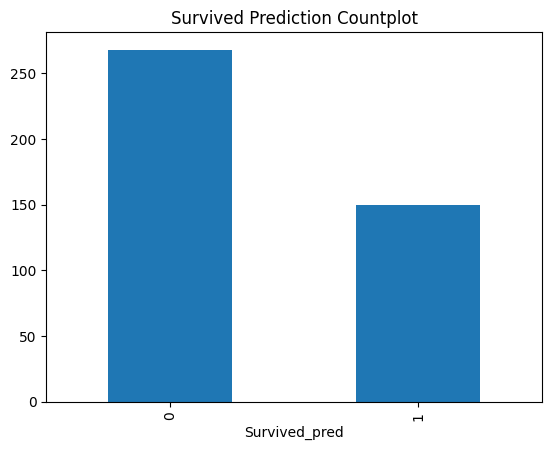

In [103]:
df_final['Survived_pred'].value_counts().plot(kind='bar', title='Survived Prediction Countplot')